https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [1]:
from Database import db_mongo

import string

db = db_mongo.db_mongo()

df_base = db.get_text_full_resume(100000000)

df_base['text'] = df_base['text'].str.replace('\n',' ').replace('\x0c',' ')
 
df_base['text'] = [word for word in df_base['text'] if word not in string.punctuation]

df = df_base.copy()


Init DB


In [2]:
df_base["class"].unique()

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
from chart_studio import plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

2021-12-01 18:25:18.946938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 18:25:18.946982: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
df['class'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Resumes', 
                                                                title='Number resumes in each class')

In [5]:
def print_plot(index):
    example = df[df.index == index][['text', 'class']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Class:', example[1])

In [6]:
print_plot(10)

PROJECT ACCOUNTANT Career Focus Dedicated and focused professional who excels at prioritizing, completing multiple tasks simultaneously and following through to achieve project goals. Seeking a role of increased responsibility and authority. Highlights  Project coordination Forward-thinking mindset Microsoft Office proficiency Business writing  Results-oriented Self-directed Strong interpersonal skills Organized and detail-oriented  Professional Experience PROJECT ACCOUNTANT  February 2003 to Current Company Name - City , State ?  Currently the on-site Project Accountant for the Gulfport High School renovation which is a CM project with direct owner purchase. Proficient with AS400, SAP and JD Edwards accounting systems and all Microsoft applications as well as Construction Imaging software for invoice coding and Bluebeam Previously managed the preparation, distribution and tracking of subcontracts, purchase orders, service agreements, change orders, insurance and bonds for multiple pro

In [7]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['text'] = df['text'].apply(clean_text)

In [8]:
df['text'] = df['text'].str.replace('\d+', '')

/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [9]:
print_plot(10)

project accountant career focus dedicated focused professional ecels prioritizing completing multiple tasks simultaneously following achieve project goals seeking role increased responsibility authority highlights project coordination forwardthinking mindset microsoft office proficiency business writing resultsoriented selfdirected strong interpersonal skills organized detailoriented professional eperience project accountant february  current company name city state currently onsite project accountant gulfport high school renovation cm project direct owner purchase proficient as sap jd edwards accounting systems microsoft applications well construction imaging software invoice coding bluebeam previously managed preparation distribution tracking subcontracts purchase orders service agreements change orders insurance bonds multiple projects include hard rock new guest tower addition island view casino renovation mda neighborhood home repair program msu science technology center ohr okeef

In [10]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 43643 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2484, 250)


In [12]:
Y = pd.get_dummies(df['class']).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (2484, 24)


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2235, 250) (2235, 24)
(249, 250) (249, 24)


In [14]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

2021-12-01 18:25:23.335426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-01 18:25:23.335484: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-01 18:25:23.335506: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2021-12-01 18:25:23.336062: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 24)                2424      
                                                                 
Total params: 5,082,824
Trainable params: 5,082,824
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
epochs = 20
batch_size = 256

history = model.fit(X_train, Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.00001)])


Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 3.1762 - accuracy: 0.0487 - val_loss: 3.1690 - val_accuracy: 0.0759
Epoch 2/20
8/8 [==============================] - 8s 962ms/step - loss: 3.1566 - accuracy: 0.1437 - val_loss: 3.1484 - val_accuracy: 0.0848
Epoch 3/20
8/8 [==============================] - 7s 894ms/step - loss: 3.1217 - accuracy: 0.1333 - val_loss: 3.1238 - val_accuracy: 0.0848
Epoch 4/20
8/8 [==============================] - 6s 800ms/step - loss: 3.0698 - accuracy: 0.1462 - val_loss: 3.0793 - val_accuracy: 0.1161
Epoch 5/20
8/8 [==============================] - 7s 833ms/step - loss: 2.9614 - accuracy: 0.2765 - val_loss: 2.9733 - val_accuracy: 0.1339
Epoch 6/20
8/8 [==============================] - 6s 752ms/step - loss: 2.8409 - accuracy: 0.2143 - val_loss: 2.9529 - val_accuracy: 0.1384
Epoch 7/20
8/8 [==============================] - 7s 828ms/step - loss: 2.6926 - accuracy: 0.2486 - val_loss: 2.8908 - val_accuracy: 0.1562
Epoch 8/20
8/8 [======

In [16]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

8/8 [==============================] - 0s 46ms/step - loss: 3.0799 - accuracy: 0.2530
Test set
  Loss: 3.080
  Accuracy: 0.253


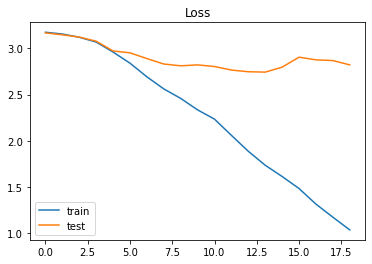

In [17]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

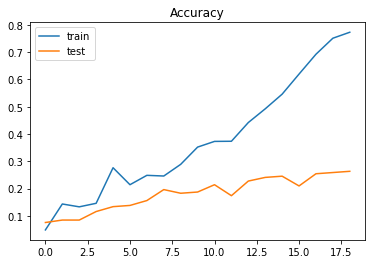

In [18]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [19]:
df_base["text"].iloc[607]

'RADIOLOGICAL CONTROL TECHNICIAN Professional Summary Dynamic college student with over 3 years of nuclear experience working as a qualified radiological control technician working in the radiological control department in a variety of areas including limited facility decommissioning, and aircraft carrier Refueling on the CVN-72. Highly enthusiastic, self- motivating and resourceful professional. Summary of Skills  40- Hour Current OSHA 29 CFR 1910.120 Hazardous Waste Quick learner Adept multi-tasker Category 3 mixed waste worker training Life Harness Qualified  U.S. Navy Article 108, Radiological Control Technician Qualification Self- disciplined Team Player Respirator Qualified Microsoft Word, Excel, PowerPointÂ   Experience Company Name City , State Radiological Control Technician 01/2016 to Current  Provide radiological controls oversight of the deconstruction and remediation activities Perform daily monitoring of radiological work, radiological surveying, environment sampling and 

In [20]:
new_complaint = [df_base["text"].iloc[607]]

seq = tokenizer.texts_to_sequences(new_complaint)

padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)

labels = df_base["class"].unique()
print(pred, labels[np.argmax(pred)])

[[2.90099648e-04 1.15344217e-02 6.44781452e-04 2.05694977e-02
  8.23669427e-04 6.59984245e-04 8.77472103e-01 1.78815320e-03
  1.28078376e-04 4.18705109e-04 1.37867848e-03 4.19301912e-04
  4.43407393e-04 3.53079895e-03 1.22209385e-04 8.63410626e-03
  1.16145544e-04 3.65835801e-02 7.79894786e-03 1.70580894e-02
  1.29519054e-03 2.74179177e-03 3.98465013e-03 1.56369770e-03]] AVIATION
